# Predicting the Sale Price of Houses

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz

from sklearn import datasets, linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import Image 

In [2]:
df = pd.read_csv("train.csv")

In [118]:
c1 = df['YrSold'] >= 1990
c2 = df['YrSold'] <= 2010
df['YearRemodAdd'].value_counts()
df[['YrSold','SaleCondition']][df['YearRemodAdd'] == 1950].to_dict()

{'SaleCondition': {8: 'Abnorml',
  9: 'Normal',
  21: 'Normal',
  29: 'Normal',
  30: 'Normal',
  51: 'Normal',
  63: 'Normal',
  68: 'Normal',
  74: 'Normal',
  90: 'Normal',
  98: 'Abnorml',
  104: 'Normal',
  107: 'Partial',
  121: 'Normal',
  127: 'Normal',
  149: 'Normal',
  154: 'Family',
  155: 'Normal',
  156: 'Normal',
  170: 'Normal',
  181: 'Normal',
  198: 'Abnorml',
  202: 'Normal',
  204: 'Normal',
  210: 'Normal',
  217: 'Family',
  239: 'Normal',
  242: 'Normal',
  246: 'Normal',
  296: 'Normal',
  307: 'Normal',
  308: 'Normal',
  312: 'Normal',
  325: 'Normal',
  329: 'Normal',
  341: 'Normal',
  342: 'Normal',
  345: 'Normal',
  352: 'Normal',
  375: 'Normal',
  380: 'Normal',
  383: 'Normal',
  390: 'Normal',
  393: 'Abnorml',
  394: 'Normal',
  398: 'Abnorml',
  406: 'Normal',
  413: 'Normal',
  417: 'Normal',
  418: 'AdjLand',
  436: 'Normal',
  448: 'Normal',
  456: 'Abnorml',
  459: 'Normal',
  491: 'Normal',
  495: 'Abnorml',
  497: 'Normal',
  514: 'Normal',
 

In [ ]:
#df.groupby(['YearBuilt']).groups
df.columns

In [119]:
ax = sns.barplot(x="YearBuilt", y="total_bill", hue="sex", data=df)

ValueError: Could not interpret input 'total_bill'

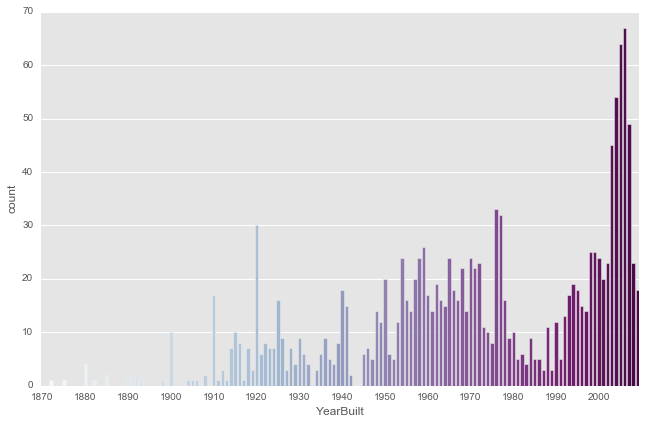

In [120]:
years = np.arange(1870, 2010)

g = sns.factorplot(x="YearBuilt", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=10)

In [18]:
sns.set(style="whitegrid", color_codes=True)
# plt.title("House Style and Sale Price")
# # sns.stripplot(x="Neighborhood", y="SalePrice", data=df,jitter=True, o='h');

# sns.boxplot(x="SaleType", y="SalePrice", data=df);

In [ ]:
df.groupby(['SaleType','YrSold','YearBuilt','YearRemodAdd']).count().to_dict()

In [ ]:
# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
plt.title("Number of Houses built each year")
plt.xlabel("Year")
plt.ylabel("Count")
df["YearBuilt"].hist()

In [ ]:
test = pd.read_csv("test.csv")

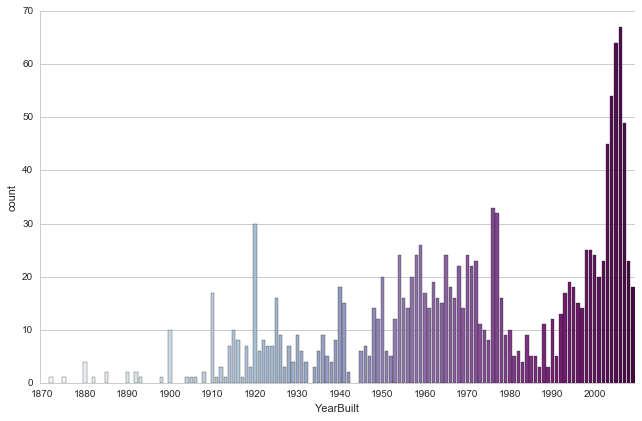

In [20]:
years = np.arange(1870, 2010)
g = sns.factorplot(x="YearBuilt", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=10)

In [ ]:
df.plot.bar();

In [ ]:
sns.distplot(df['SalePrice']);

In [ ]:
df[df['SalePrice'] == 755000.000000]

In [ ]:
df['LotArea'].describe()

In [ ]:
print df[df['LotArea'] == 215245]

In [ ]:
# df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 
#  'BsmtFinType1','BsmtFinSF1','BsmtFinType2',
#    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].to_dict()
#df.ix[df['Alley'].isnull()].to_dict()['Street']
#df.ix[df['MiscFeature'].isnull()].to_dict()['MiscVal']
#df['Fence'].describe()

In [ ]:
for i in df.columns:
    print i,df[i][313],df[i][691]

In [ ]:
# df['Neighborhood'].ix[df['Electrical'].isnull()]
# df[['Neighborhood','Electrical']].groupby(['Neighborhood','Electrical']).groups
#df[['Neighborhood','MasVnrType','MasVnrArea']].groupby(['Neighborhood','MasVnrType','MasVnrArea']).groups
df[['Neighborhood', 'MasVnrType']].ix[df['MasVnrArea'].isnull()]

In [ ]:
def find_missing_columns(df):
    lst_nmissing = []
    lst_missing = []
    for c in df.columns:
        if not (df[c].count() < 1460):
            lst_nmissing.append(c)
        else:
            print c, (1460 - df[c].count())
            lst_missing.append(c)
    #print lst_missing
    
    print "Number of Columns with no missing value:",len(lst_nmissing)
    
    print "Number of Columns with missing value:",len(lst_missing)
    
    #lst_missing.append('SalePrice')
    
    #lst_missing.append('TotalBsmtSF')
    return lst_missing,lst_nmissing
missing_c,notmissing_c = find_missing_columns(df)
#print notmissing_c
#fill_df = df[notmissing_c]


In [6]:
def fill_missing(df):
    
    df['LotFrontage'].fillna(0,inplace=True)
    df['Alley'].fillna('NA',inplace=True)
    df['MasVnrArea'].fillna(0,inplace=True)
    df['MasVnrType'].fillna('None',inplace=True)
    df['BsmtQual'].fillna('NA',inplace=True)
    df['BsmtCond'].fillna('NA',inplace=True)
    df['BsmtExposure'].fillna('NA',inplace=True)
    df['BsmtFinType1'].fillna('NA',inplace=True)
    df['BsmtFinType2'].fillna('NA',inplace=True)
    df['Electrical'].fillna('FuseA',inplace=True)
    df['FireplaceQu'].fillna('NA',inplace=True)
    df['GarageType'].fillna('NA',inplace=True)

    # Remove column
    #df['GarageYrBlt'].fillna('None',inplace=True)

    df['GarageFinish'].fillna('NA',inplace=True)
    df['GarageQual'].fillna('NA',inplace=True)
    df['GarageCond'].fillna('NA',inplace=True)
    df['PoolQC'].fillna('NA',inplace=True)
    df['Fence'].fillna('MnWw',inplace=True)
    df['MiscFeature'].fillna('NA',inplace=True)
    
    return df


In [7]:
def vectorize(df):
    
    data = df.to_dict(orient='records')
    
    vec = DictVectorizer()
    
    vec_data = vec.fit_transform(data).toarray()
    
    return vec,vec_data

In [8]:
def linear_regr(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    regr = linear_model.LinearRegression()
    
    #fit model
    regr.fit(X_train, y_train)
    
    predicted = regr.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    #print predicted.score
    
    #plot_actual_predicted(actvspred_df)
    
    #print actvspred_df
    
    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    
    # The mean squared error
    print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))
    
    plot_coeffs(regr.coef_,feature_names,"Linear")


In [9]:
def plot_coeffs(coeffs,feature_names,model_name):
    
    coeff = pd.Series(coeffs,index = feature_names )
    imp_coef = pd.concat([coeff.sort_values().head(10),
                     coeff.sort_values().tail(10)])
    
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "bar")

    plt.title("Coefficients in the "+model_name+" Model")

In [10]:
def adaboost(train,target,feature_names):

    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rng = np.random.RandomState(1)
    
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                              n_estimators=300, random_state=rng)
    
    
    regr.fit(X_train, y_train)

    # Predict
    predicted = regr.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    print regr.score(X_test, y_test)
    
#     plot_actual_predicted(actvspred_df)
    

In [11]:
# reduced = df.columns.tolist()
# # removing certain fields
# reduced.remove('Alley')
# reduced.remove('PoolQC')
# reduced.remove('Fence')
# reduced.remove('MiscFeature')

# # removing rows that have missing fields
# refined_df = refined_df.dropna()

# #removing target variable to get the train set
# reduced.remove('SalePrice')
# train_df = refined_df[reduced]

# #have the target variable
# target_df = refined_df['SalePrice']

# #vectorize train 
# vec,train = vectorize(train_df)

# #call the regression method
# #linear_regr(train,target_df,vec.get_feature_names())

# imp_features_linear = ['LotArea','BsmtExposure', '1stFlrSF', 'BldgType', 'BsmtFinType1',
#                        'BsmtCond', '2ndFlrSF', 'LowQualFinSF','TotalBsmtSF','GrLivArea','SalePrice']
# linear_df = refined_df[imp_features_linear]

def preprocessing(df):
    
    train = df.columns.tolist()
    
    train.remove('SalePrice')
    
    train.remove('Id')
    
    train.remove('GarageYrBlt')
    
    train.remove('Alley')
    
    train_df = df[train]
    
    #print len(train_df.columns)
    target_df = df['SalePrice']
    
    vec,train = vectorize(train_df)
    
    return vec,train

#call the regression method
new_df = fill_missing(df)

vec,train = preprocessing(new_df)

# linear_regr(train,target_df,vec.get_feature_names())

# call decsion tree
#decision_Tree(train,target_df,vec.get_feature_names())

#adaboost(train,target_df,vec.get_feature_names())

#decision_tree_regr(train,target_df,vec.get_feature_names())

Mean squared error: 116376940667428143104.00
Variance score: -15852164112.21


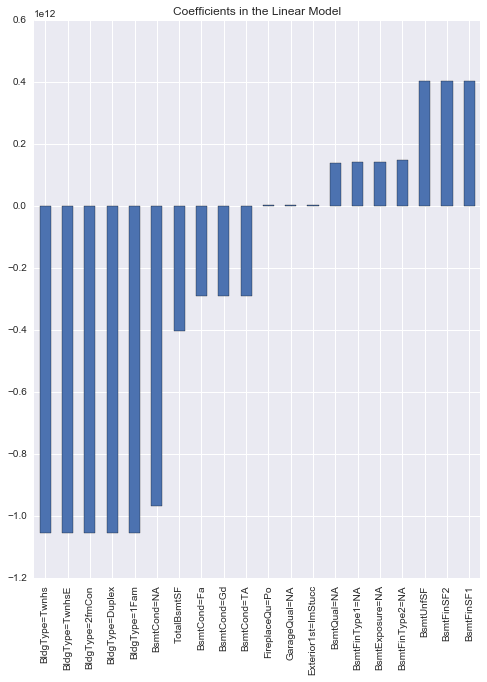

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

new_df = fill_missing(df)

vec,train = preprocessing(new_df)
target = new_df['SalePrice']

def kfold_crossvalidation(train,target,feature_names):
    
    X = train
    y = target
    
    scores = list()
    scores_std = list()
    
    rng = np.random.RandomState()
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                              n_estimators=300, random_state=rng)
#     regr = DecisionTreeRegressor(max_depth=6)
                            
    #regr.fit(X_train, y_train)
    
    n_folds = 10

    this_scores = cross_val_score(regr, X, y, cv=n_folds, n_jobs=1)
    print this_scores
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

    scores, scores_std = np.array(scores), np.array(scores_std)
    
    print scores

# kfold_crossvalidation(train,target,vec.get_feature_names())

linear_regr(train,target,vec.get_feature_names())

#decision_tree_regr(train,target,vec.get_feature_names())
# adaboost(train,target,vec.get_feature_names())

In [113]:
def decision_tree_regr(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    regr = DecisionTreeRegressor(max_depth=4)
    regr.fit(X_train, y_train)
    
    predicted = regr.predict(X_test)
    
    print regr.score(X_test, y_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    # Explained variance score: 1 is perfect prediction
    #     print('Variance score: %.2f' % regr.score(X_test, y_test))
    
    
    #     print regr.feature_importances_
    
    #     plot_actual_predicted(actvspred_df)
    plot_decision_tree_flowchart(regr,feature_names)

In [110]:
def decision_Tree(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    
    dtree = tree.DecisionTreeClassifier()
    dtree.fit(train, target)
    
    #fit model
    dtree.fit(X_train, y_train)
    
    predicted = dtree.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    #plot_actual_predicted(actvspred_df)
    
    # The mean squared error
    print("Mean squared error: %.2f" % np.mean((dtree.predict(X_test) - y_test) ** 2))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % dtree.score(X_test, y_test))
    
#     print dtree.feature_importance_
    
    #plot_decision_tree(dtree,feature_names)
    
def plot_decision_tree_flowchart(dtree,t_feature_names):
    
    with open('/Users/aramamurthy/Downloads/Github/Kaggle-HPAR/tree.dot','w') as dotfile:
        export_graphviz(dtree,dotfile,feature_names=t_feature_names)
    
    graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
    graph.write_png('/Users/aramamurthy/Downloads/Github/Kaggle-HPAR/tree_diagram.png')
        
def plot_actual_predicted(df):
    
    g = sns.jointplot( "Predicted","Actual", data=df, kind="reg")
    g.set_axis_labels('Predicted in $', 'Actual in $')
    plt.title("Predicted vs Actual - Decision Tree",x=0.5, y = 1.2)